<a href="https://colab.research.google.com/github/Gabriele90/ML-for-the-life-sciences-/blob/main/K_mean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTRODUCTION

The aim of this exercise is to segment the molecules on their LogP, MW and pIC50. I used K-means clustering for executing a "Molecular segmentation". It consists in dividing molecules based on subgroups that are similar. It is useful in pharmacology analysis.

# **Importing libraries and dataset**

In [71]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import seaborn as sns

In [72]:
df = pd.read_csv("phosphatase3class.csv")
df.head(5)

,Unnamed: 0,molecule_chembl_id,canonical_smiles,Class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL265864,COC(=O)c1cc(NC(=O)CCCC(=O)NC2CC(C)(C)N([O])C(C...,inactive,434.513,2.7709,3.0,6.0,3.000000
1,1,CHEMBL389502,CC1(C)CC(NC(=O)/C=C/c2ccc(-c3cccc([N+](=O)[O-]...,inactive,412.466,4.3513,1.0,5.0,3.675718
2,2,CHEMBL445152,CC1(C)CC(NC(=O)CCCC(=O)Nc2ccc(O)c(C(=O)O)c2)CC...,inactive,420.486,2.6825,4.0,5.0,3.000000
3,3,CHEMBL390088,CC1(C)CC(NC(=O)/C=C/c2ccc(-c3ccc([N+](=O)[O-])...,inactive,412.466,4.3513,1.0,5.0,3.000000
4,4,CHEMBL227379,CC1(C)CC(NC(=O)/C=C/c2ccc(-c3ccc(O)c(C(=O)O)c3...,intermediate,427.477,3.8469,3.0,5.0,5.124939


***Data cleaning and feature enginering***

In [73]:
df.drop("molecule_chembl_id", axis = 1, inplace=True)

In [74]:
df.drop("canonical_smiles", axis = 1, inplace=True)

In [103]:
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [120]:
df["Class"].replace("inactive", 0, inplace=True)
df["Class"].replace("active", 1, inplace=True)
df["Class"].replace("intermediate", 2, inplace=True)
df.head(10)

,Class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,434.513,2.7709,3.0,6.0,3.000000
1,0,412.466,4.3513,1.0,5.0,3.675718
2,0,420.486,2.6825,4.0,5.0,3.000000
3,0,412.466,4.3513,1.0,5.0,3.000000
4,2,427.477,3.8469,3.0,5.0,5.124939
5,0,387.456,3.8071,3.0,5.0,3.000000
6,0,401.483,3.8955,2.0,6.0,3.000000
7,0,532.556,6.3342,3.0,7.0,4.493495
8,1,612.154,5.8607,1.0,8.0,6.207608
9,1,595.699,5.3464,1.0,8.0,6.060481


Text(0.5, 1.0, 'Bioactivity Class')

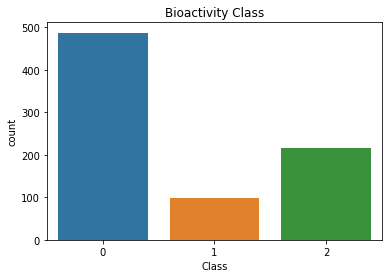

In [121]:
sns.countplot(x='Class', data=df)
plt.title('Bioactivity Class')

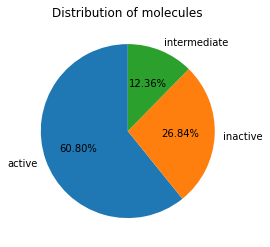

In [123]:
bio_class= df.Class.value_counts()
bio_class_label=['active','inactive','intermediate']
plt.pie(bio_class, labels=bio_class_label, autopct='%0.2f%%',startangle=90)
plt.title('Distribution of molecules')
plt.show()

In [124]:
df.describe()

,Class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.660424,377.194076,3.431050,1.483146,5.091136,4.799892
std,0.872951,100.248573,1.659214,0.956571,1.988199,0.899027
min,0.000000,112.128000,-1.816800,0.000000,0.000000,3.000000
25%,0.000000,305.374000,2.397540,1.000000,4.000000,4.000000
50%,0.000000,373.481000,3.356220,1.000000,5.000000,4.322393
75%,2.000000,444.440000,4.440220,2.000000,6.000000,5.554396
max,2.000000,1085.631000,11.793900,9.000000,11.000000,7.841638


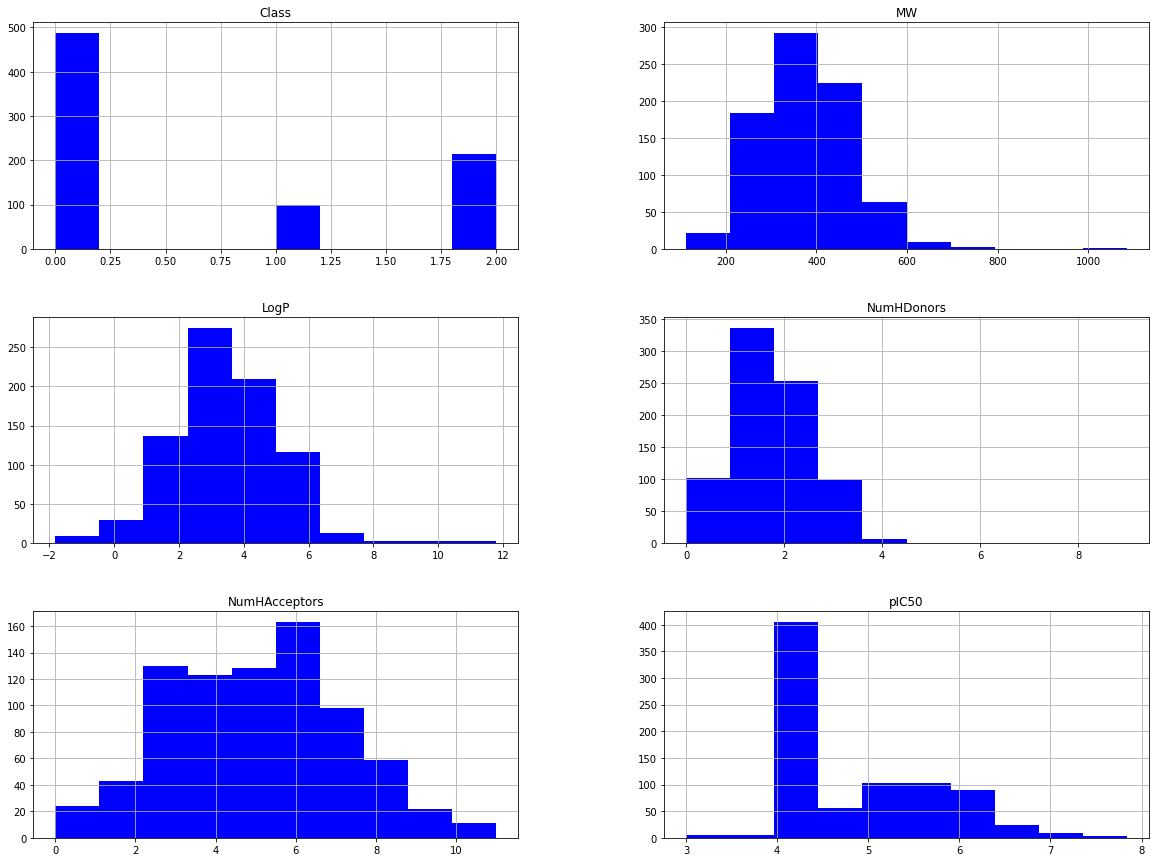

In [125]:
df.hist(color='blue', figsize=(20,15));

In [126]:
mw_zeros = df[df['MW'] == 0].shape[0]
log_zeros = df[df['LogP'] == 0].shape[0]
hdon_zeros = df[df['NumHDonors'] == 0].shape[0]
hacc_zeros = df[df['NumHAcceptors'] == 0].shape[0]
pIC_zeros = df[df['pIC50'] == 0].shape[0]
print(f"Number of zeros 'MW' column have : {mw_zeros}")
print(f"Number of zeros 'LogP' column have : {log_zeros}")
print(f"Number of zeros 'NumHDonors' column have : {hdon_zeros}")
print(f"Number of zeros 'NumHAcceptors' column have : {hacc_zeros}")
print(f"Number of zeros 'pIC50' column have : {pIC_zeros}")

Number of zeros 'MW' column have : 0
Number of zeros 'LogP' column have : 0
Number of zeros 'NumHDonors' column have : 102
Number of zeros 'NumHAcceptors' column have : 1
Number of zeros 'pIC50' column have : 0


In [127]:
df2 =df.copy()

In [128]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,801.0,0.660424,0.872951,0.0000,0.00000,0.000000,2.000000,2.000000
MW,801.0,377.194076,100.248573,112.1280,305.37400,373.481000,444.440000,1085.631000
LogP,801.0,3.431050,1.659214,-1.8168,2.39754,3.356220,4.440220,11.793900
NumHDonors,801.0,1.483146,0.956571,0.0000,1.00000,1.000000,2.000000,9.000000
NumHAcceptors,801.0,5.091136,1.988199,0.0000,4.00000,5.000000,6.000000,11.000000
pIC50,801.0,4.799892,0.899027,3.0000,4.00000,4.322393,5.554396,7.841638


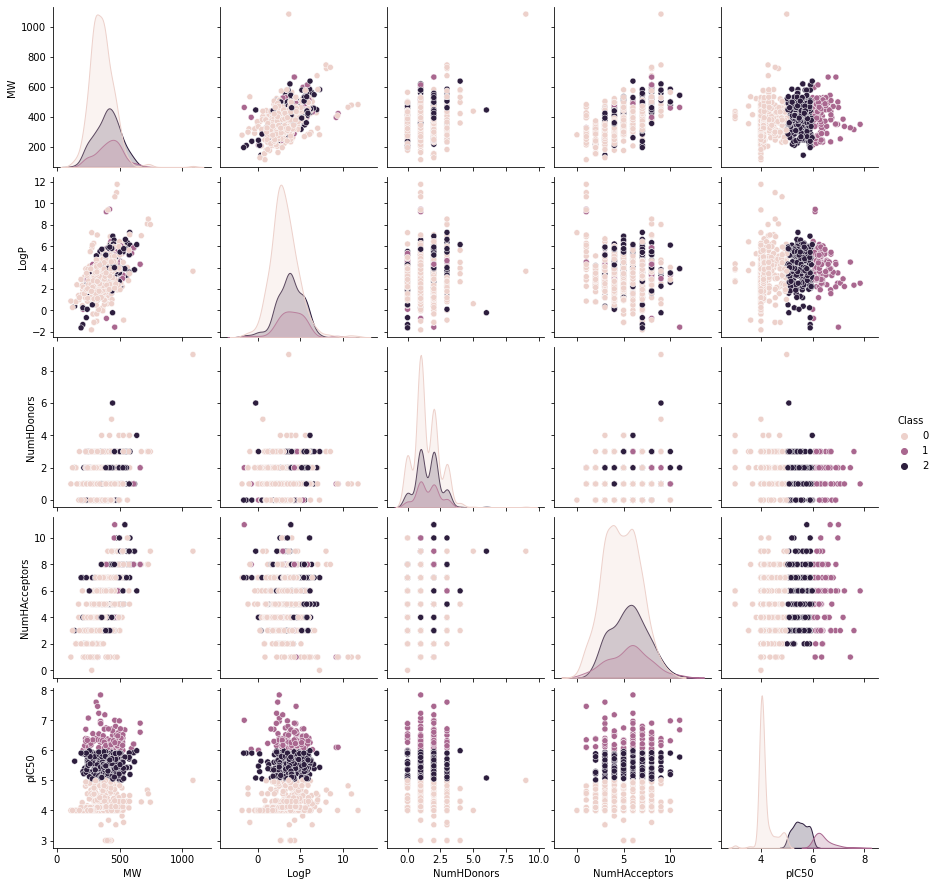

In [129]:
import seaborn as sns
sns.pairplot(data = df2, hue = 'Class');

***K-mean clustering***

Lets apply k-means on our dataset, and take look at cluster labels.

The KMeans class has many parameters that can be used, but we will be using these three:

init: Initialization method of the centroids.
Value will be: "k-means++"

k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

n_clusters: The number of clusters to form as well as the number of centroids to generate.

Value will be: 5 (we can change this anytime if we want to test more values)

n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

Value will be: automatic but can be chosen if needed

Let's initialize KMeans with these parameters, where the output parameter is called k_means.

In [154]:
df_mw_pic=df2.drop(["LogP", "NumHDonors", "NumHAcceptors", "Class"], axis = 1)

In [175]:
k_means=KMeans(n_clusters=4)

In [176]:
k_means.fit(df_mw_pic)
labels = k_means.labels_
print(labels)

[3 0 3 0 3 0 0 3 2 2 2 2 2 2 2 2 2 2 1 1 1 0 3 1 1 1 3 1 3 1 0 0 0 0 0 0 3
 0 0 0 0 0 0 1 3 1 0 1 0 0 1 1 1 0 3 0 0 0 0 1 1 0 0 3 0 1 3 1 0 0 0 3 1 1
 3 1 3 0 1 1 1 0 3 3 0 1 3 1 3 0 0 3 0 0 1 0 1 1 1 3 1 0 1 3 1 0 0 0 1 1 0
 1 1 1 0 0 3 0 1 1 0 1 1 0 0 1 0 0 1 3 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 3 1 0
 1 0 1 1 0 1 1 0 0 0 1 3 1 0 3 0 1 1 0 1 1 3 3 0 3 0 0 0 1 3 0 0 1 0 1 0 1
 1 3 1 0 3 0 1 0 1 1 1 1 1 1 1 1 3 3 1 3 1 1 0 0 1 1 0 3 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 3 1 1 3 3 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1
 1 1 3 1 0 0 1 0 1 3 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 3 1 3 0 3 3 2 2 2 2
 2 3 3 3 2 3 3 0 1 0 0 0 0 3 0 0 0 1 0 1 1 3 1 3 3 0 0 0 3 1 0 0 1 3 1 1 0
 0 3 0 0 3 3 3 1 0 3 0 0 3 3 0 0 0 0 0 0 3 3 1 3 3 0 3 0 0 0 0 3 3 1 0 3 0
 0 0 1 0 0 1 0 3 1 3 0 1 0 3 0 0 3 0 0 1 3 1 0 0 0 3 0 2 0 0 1 1 3 3 3 0 1
 3 0 3 1 3 3 0 3 0 0 0 3 3 3 3 3 3 0 3 3 1 1 0 3 1 0 0 3 1 1 1 0 0 3 0 0 0
 0 0 0 1 0 0 1 3 2 2 0 1 3 3 0 1 0 3 0 0 0 2 0 0 1 0 1 3 3 1 0 0 0 0 0 0 0
 0 3 0 0 0 1 1 0 3 0 0 0 

In [177]:
centers_class=k_means_class.cluster_centers_
centers_class

array([[ 381.43741026,    4.66550852],
       [ 284.00884946,    4.43022461],
       [ 586.45015385,    5.4198777 ],
       [ 489.6302037 ,    5.1467598 ],
       [ 152.4648    ,    4.16382722],
       [1085.631     ,    5.        ],
       [ 345.33916505,    4.68406645],
       [ 455.25645556,    4.98790587],
       [ 243.93125862,    4.89454437],
       [ 699.98133333,    5.21591557],
       [ 416.90685714,    4.93274219],
       [ 522.66964103,    5.33892273],
       [ 210.949     ,    4.64476046],
       [ 313.42977778,    4.53163786]])

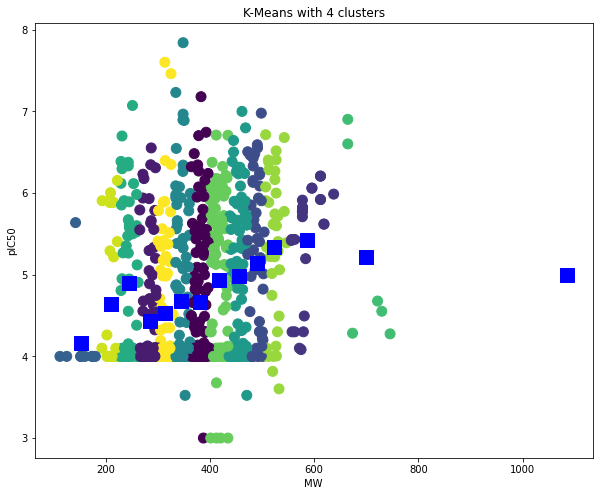

In [220]:
plt.figure(figsize=(10, 8))

plt.scatter(df_mw_pic['MW'], 
            df_mw_pic['pIC50'], 
            c=k_means.labels_, s=100)

plt.scatter(centers_class[:,0], centers_class[:,1], color='blue', marker='s', s=200) 

plt.xlabel('MW')
plt.ylabel('pIC50')
plt.title('K-Means with 4 clusters')

plt.show()

This graph shows that we can have 4 clusters based on the MW and the pCI50.

In [179]:
score = silhouette_score (df_mw_pic, k_means.labels_)

print("The score is = ", score)

The score is =  0.5369697466676656


The score of 0.5 is good. Let's see if we can get it higher using the inertia metrics.

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters: MW and pIC50')

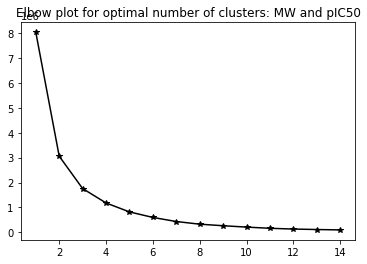

In [180]:
elbowlist1 = []
for i in range(1,15): 
    k_means = KMeans(n_clusters=i, init="k-means++",random_state=0)
    k_means.fit(df_mw_pic)
    elbowlist1.append(k_means.inertia_)  

plt.plot(range(1,15),elbowlist1,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters: MW and pIC50")

Here we can make sure that the cluster number 4 that we chose is correct. The elbow plot has a distinct slope break at 4 indicating that 4 is the optimal cluster number when comparing between age and spending. It's good to construct this plot to make sure that the analysis is ok. We can rerun our analysis by updating the number of clusters based on this plot.

***3D PLOT***

We will use three dimensions for this analysis and visualise results in a 3D graph. We will have an interactive 3D graph to help with visualisation.

In [189]:
df_3D=df2.drop(["Class","NumHDonors","NumHAcceptors"], axis = 1)

In [213]:
k_means_3D=KMeans(n_clusters=4)

In [214]:
k_means_3D.fit(df_3D)
labels = k_means_3D.labels_
print(labels)

[1 0 1 0 1 0 0 1 3 3 3 3 3 3 3 3 3 3 2 2 2 0 1 2 2 2 1 2 1 2 0 0 0 0 0 0 1
 0 0 0 0 0 0 2 1 2 0 2 0 0 2 2 2 0 1 0 0 0 0 2 2 0 0 1 0 2 1 2 0 0 0 1 2 2
 1 2 1 0 2 2 2 0 1 1 0 2 1 2 1 0 0 1 0 0 2 0 2 2 2 1 2 0 2 1 2 0 0 0 2 2 0
 2 2 2 0 0 1 0 2 2 0 2 2 0 0 2 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 0 0 0 1 2 0
 2 0 2 2 0 2 2 0 0 0 2 1 2 0 1 0 2 2 0 2 2 1 1 0 1 0 0 0 2 1 0 0 2 0 2 0 2
 2 1 2 0 1 0 2 0 2 2 2 2 2 2 2 2 1 1 2 1 2 2 0 0 2 2 0 1 0 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 2 0 2 2 2 0 2 0 2 0 0 1 2 2 1 1 2 0 2 0 2 2 2 2 0 0 0 0 0 2 2
 2 2 1 2 0 0 2 0 2 1 2 0 2 2 2 0 0 2 0 2 2 2 2 2 2 2 2 1 2 1 0 1 1 3 3 3 3
 3 1 1 1 3 1 1 0 2 0 0 0 0 1 0 0 0 2 0 2 2 1 2 1 1 0 0 0 1 2 0 0 2 1 2 2 0
 0 1 0 0 1 1 1 2 0 1 0 0 1 1 0 0 0 0 0 0 1 1 2 1 1 0 1 0 0 0 0 1 1 2 0 1 0
 0 0 2 0 0 2 0 1 2 1 0 2 0 1 0 0 1 0 0 2 1 2 0 0 0 1 0 3 0 0 2 2 1 1 1 0 2
 1 0 1 2 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 2 2 0 1 2 0 0 1 2 2 2 0 0 1 0 0 0
 0 0 0 2 0 0 2 1 1 3 0 2 1 1 0 2 0 1 0 0 0 3 0 0 2 0 2 1 1 2 0 0 0 0 0 0 0
 0 1 0 0 0 2 2 0 1 0 0 0 

In [215]:
centers_3D=k_means_3D.cluster_centers_
centers_3D

array([[368.46090196,   3.42648578,   4.7047677 ],
       [469.68378571,   4.27728705,   5.0726452 ],
       [266.22128692,   2.36525692,   4.58303454],
       [619.99429412,   5.32613   ,   5.37066821]])

In [216]:
from matplotlib import interactive
interactive(True)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


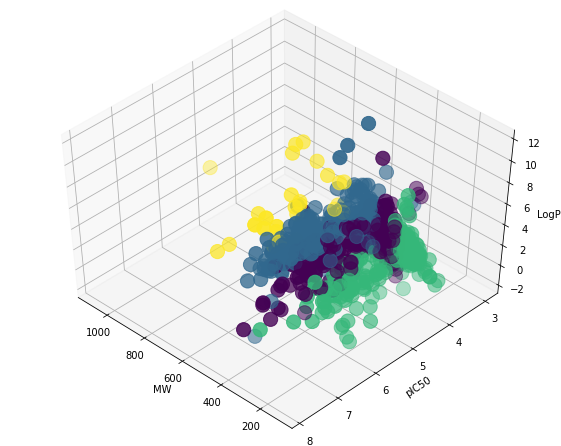

In [217]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
#plt.ylabel('Age', fontsize=18)
#plt.xlabel('Income', fontsize=16)
#plt.zlabel('Education', fontsize=16)
ax.set_xlabel('MW')
ax.set_ylabel('pIC50')
ax.set_zlabel('LogP')

ax.scatter(df_3D['MW'], df_3D['pIC50'], df_3D['LogP'], c= labels.astype(np.float), s=200)

Here we can make sure that the cluster number 4 that we chose is correct. The elbow plot has a distinct slope break at 4 indicating that 4 is the optimal cluster number when comparing between MW, LogP and pIC50. It's good to construct this plot to make sure that the analysis is ok. We can rerun our analysis by updating the number of clusters based on this plot.

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters: MW, pIC50 and LogP')

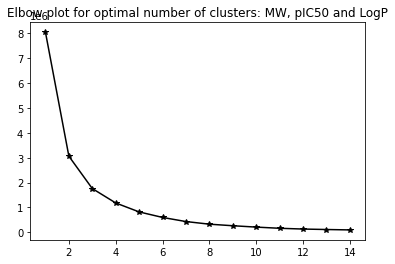

In [218]:
%matplotlib inline   

elbowlist3 = []
for i in range(1,15): 
    k_means_3D = KMeans(n_clusters=i, init="k-means++",random_state=0)
    k_means_3D.fit(df_3D)
    elbowlist3.append(k_means_3D.inertia_)  

plt.plot(range(1,15),elbowlist3,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters: MW, pIC50 and LogP")

In [219]:
score_2 = silhouette_score (df_3D, k_means_3D.labels_)

print("The score is = ", score_2)

The score is =  0.5349971407589639


Here as well we can notice that the cluster number 4 that we chose is correct. The elbow plot has a distinct slope break at 5 indicating that 5 is the optimal cluster number when comparing between MW, LogP and pIC50.